In [ ]:
import math
#A1

# Function to calculate entropy
def calculate_entropy(yes_count, total_count):
    if yes_count == 0 or yes_count == total_count:
        return 0
    p_yes = yes_count / total_count
    p_no = 1 - p_yes
    entropy = -p_yes * math.log2(p_yes) - p_no * math.log2(p_no)
    return entropy

# Function to calculate information gain
def calculate_information_gain(attribute_values, class_labels):
    total_count = len(class_labels)
    entropy_root = calculate_entropy(class_labels.count("yes"), total_count)
    weighted_entropy = 0

    unique_values = set(attribute_values)
    for value in unique_values:
        indices = [i for i, x in enumerate(attribute_values) if x == value]
        subset_class_labels = [class_labels[i] for i in indices]
        weighted_entropy += (len(subset_class_labels) / total_count) * calculate_entropy(subset_class_labels.count("yes"), len(subset_class_labels))

    information_gain = entropy_root - weighted_entropy
    return information_gain

# Data
age = ["<=30", "<=30", "31...40", ">40", ">40", ">40", "31...40", "<=30", "<=30", ">40", "<=30", "31...40", "31...40", ">40"]
income = ["high", "high", "high", "medium", "low", "low", "low", "medium", "low", "medium", "medium", "medium", "high", "medium"]
student = ["no", "no", "no", "no", "yes", "yes", "yes", "no", "yes", "yes", "yes", "no", "yes", "no"]
credit_rating = ["fair", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "fair", "fair", "excellent", "excellent", "fair", "fair"]
buys_computer = ["no", "no", "yes", "yes", "yes", "no", "yes", "no", "yes", "yes", "yes", "yes", "yes", "no"]

# Calculate entropy at the root node
total_instances = len(buys_computer)
yes_count = buys_computer.count("yes")
no_count = buys_computer.count("no")
entropy_root = calculate_entropy(yes_count, total_instances)

# Calculate Information Gain for each attribute
information_gains = []

for attribute_values in [age, income, student, credit_rating]:
    information_gain = calculate_information_gain(attribute_values, buys_computer)
    information_gains.append(information_gain)

# Find the attribute with the highest Information Gain (the root node)
root_attribute_index = information_gains.index(max(information_gains))
root_attribute = ["age", "income", "student", "credit_rating"][root_attribute_index]

print("Entropy at root node:", entropy_root)
print("Information Gains:")
for i, attribute in enumerate(["age", "income", "student", "credit_rating"]):
    print(attribute, ":", information_gains[i])

print("\nThe first feature for constructing the decision tree (root node) is:", root_attribute)


Entropy at root node: 0.9402859586706311
Information Gains:
age : 0.24674981977443933
income : 0.02922256565895487
student : 0.15183550136234159
credit_rating : 0.003184853044648994

The first feature for constructing the decision tree (root node) is: age


In [ ]:
#A2)

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


age_encoded = le.fit_transform(age)
income_encoded = le.fit_transform(income)
student_encoded = le.fit_transform(student)
credit_rating_encoded = le.fit_transform(credit_rating)

# Creating feature matrix and target vector
X = list(zip(age_encoded, income_encoded, student_encoded, credit_rating_encoded))
y = buys_computer

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a Decision Tree classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Fitting the classifier to the training data
clf.fit(X_train, y_train)

# Calculating the depth of the tree
tree_depth = clf.get_depth()

print("Depth of the constructed Decision Tree:", tree_depth)


Depth of the constructed Decision Tree: 3


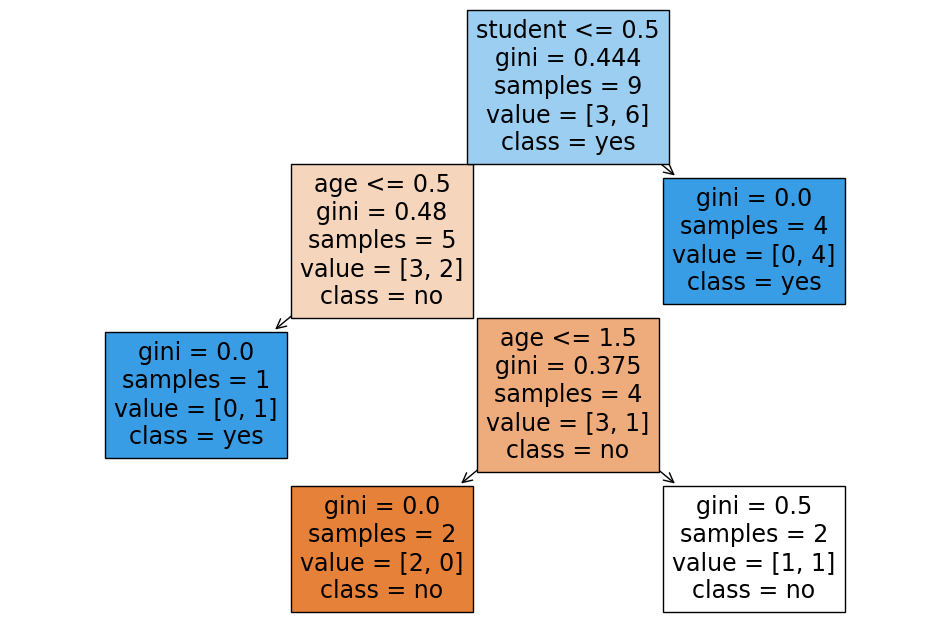

In [ ]:
#A3)
import math
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Your data and preprocessing code here...

# Create a Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=["age", "income", "student", "credit_rating"], class_names=["no", "yes"])
plt.show()
